# Source-Code:

In [1]:
# Retrieve for Related Dataset in System..
import pandas as pd
import requests
import os
from io import StringIO  # Required library importing...

url = "https://github.com/Shaik-Mohammed-Kaif/Candidate-Elimination-Algo/raw/refs/heads/main/Sample_dataset.csv"

df = pd.read_csv(url)
print(df)

        sky Airtemp Humidity    Wind Water Forecast WaterSport
0    Cloudy    Cold     High  Strong  Warm   Change        Yes
1     Sunny    Warm   Normal  Strong  Warm     Same        Yes
2     Sunny    Warm     High  Strong  Warm     Same        Yes
3    Cloudy    Cold     High  Strong  Warm   Change         No
4     Sunny    Warm     High  Strong  Cool   Change        Yes
5      Rain    Mild     High    Weak  Cool   Change         No
6      Rain    Cool   Normal    Weak  Cool     Same         No
7  Overcast    Cool   Normal  Strong  Warm     Same        Yes


In [2]:
import numpy as np
import math
import csv
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

class Node:
    def __init__(self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""

    def __str__(self):
        return self.attribute

def subtables(data, col, delete):
    """ Generate subtables for decision tree split. """
    items, counts = np.unique(data[:, col], return_counts=True)
    dict_tables = {}

    for item in items:
        sub_table = data[data[:, col] == item]  # Filter rows where column matches item
        if delete:
            sub_table = np.delete(sub_table, col, axis=1)  # Remove column
        dict_tables[item] = sub_table

    return items, dict_tables

def entropy(S):
    """ Compute entropy for a given dataset. """
    unique_vals, counts = np.unique(S, return_counts=True)
    probs = counts / S.size
    return -np.sum(probs * np.log2(probs)) if probs.size > 1 else 0

def gain_ratio(data, col):
    """ Compute Gain Ratio for a given column in the dataset. """
    items, sub_tables = subtables(data, col, delete=False)
    total_size = data.shape[0]
    
    weighted_entropy = sum(
        (sub_table.shape[0] / total_size) * entropy(sub_table[:, -1])
        for sub_table in sub_tables.values()
    )

    intrinsic_value = -sum(
        (sub_table.shape[0] / total_size) * math.log2(sub_table.shape[0] / total_size)
        for sub_table in sub_tables.values() if sub_table.shape[0] > 0
    )

    total_entropy = entropy(data[:, -1])
    return (total_entropy - weighted_entropy) / intrinsic_value if intrinsic_value != 0 else 0

def create_node(data, metadata):
    """ Recursively create a decision tree using gain ratio. """
    unique_classes = np.unique(data[:, -1])
    
    # If all rows belong to one class, return leaf node
    if unique_classes.shape[0] == 1:
        leaf_node = Node("")
        leaf_node.answer = unique_classes[0]
        return leaf_node

    # Compute gain ratio for each feature
    gains = np.array([gain_ratio(data, col) for col in range(data.shape[1] - 1)])
    
    # If all gains are zero, return most frequent class
    if np.all(gains == 0):
        most_common_class = unique_classes[np.argmax(np.unique(data[:, -1], return_counts=True)[1])]
        leaf_node = Node("")
        leaf_node.answer = most_common_class
        return leaf_node

    # Select feature with highest gain ratio
    best_feature_idx = np.argmax(gains)
    node = Node(metadata[best_feature_idx])

    # Split data and recursively build child nodes
    items, sub_tables = subtables(data, best_feature_idx, delete=True)
    metadata = np.delete(metadata, best_feature_idx, axis=0)

    for item, sub_table in sub_tables.items():
        child = create_node(sub_table, metadata)
        node.children.append((item, child))

    return node

def print_tree(node, level=0):
    """ Print decision tree in human-readable format. """
    indent = " " * level
    if node.answer:
        print(f"{indent}Leaf: {node.answer}")
        return

    print(f"{indent}Node: {node.attribute}")
    for value, child in node.children:
        print(f"{indent}  Value: {value}")
        print_tree(child, level + 4)

def read_data(file_path):
    """ Read CSV data into numpy array. """
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
        metadata = np.array(data[0])  # First row as metadata
        data = np.array(data[1:])  # Remaining rows as data
    return metadata, data

# Load data
metadata, traindata = read_data("sample.csv")

# Convert to NumPy array
data = np.array(traindata, dtype=str)

# Build decision tree
root = create_node(data, metadata)

# Print decision tree
print_tree(root)

# Convert categorical data to numerical format for Scikit-Learn Decision Tree
X = data[:, :-1]  # Features
y = data[:, -1]   # Target

label_encoders = []
for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])
    label_encoders.append(le)

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

# Train Decision Tree using Scikit-Learn
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X.astype(int), y)

Node: Wind
  Value: Strong
    Node: sky
      Value: Cloudy
        Leaf: No
      Value: Overcast
        Leaf: Yes
      Value: Sunny
        Leaf: Yes
  Value: Weak
    Leaf: No


DecisionTreeClassifier(criterion='entropy')

In [3]:
import numpy as np
import math
import csv
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to read CSV data
def read_data(file_path):
    """ Read CSV data into numpy array. """
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
        metadata = np.array(data[0])  # First row as metadata
        data = np.array(data[1:])  # Remaining rows as data
    return metadata, data

# Load dataset
metadata, traindata = read_data("sample.csv")

# Convert data to numpy array
data = np.array(traindata, dtype=str)

# Separate features and target variable
X = data[:, :-1]  # Features
y = data[:, -1]   # Target

# Encode categorical features into numerical values
label_encoders = []
for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])
    label_encoders.append(le)

# Encode target labels
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X.astype(int), y, test_size=0.2, random_state=42)

# Train the Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrix:
[[1 0]
 [0 1]]


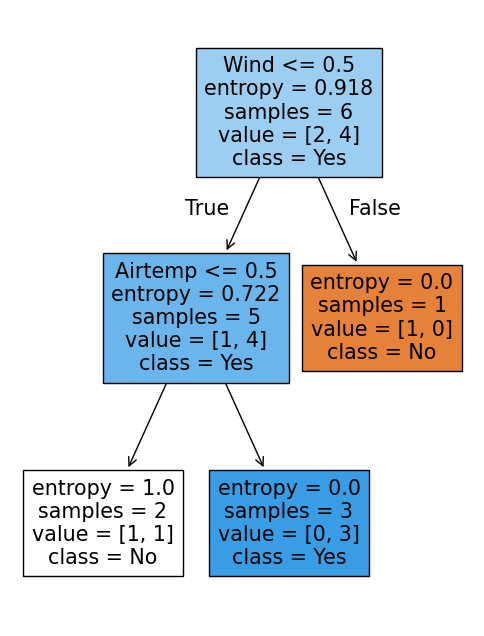

In [4]:
# Plot the Decision Tree
plt.figure(figsize=(6, 8))
plot_tree(clf, feature_names=metadata[:-1], class_names=y_encoder.classes_, filled=True)
plt.show()

# The End